**Module Path**

In [1]:
import os

os.chdir("./../../")

**Device**

In [2]:
from utils import get_device

device = get_device()

# Cross Entropy Method

---

## Explore Mountain Car Continuous

We begin by importing the necessary packages.

In [3]:
import numpy as np
from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

import matplotlib.pyplot as plt

# Set plotting options
%matplotlib inline
plt.style.use("ggplot")
np.set_printoptions(precision=3, linewidth=120)

is_ipython = "inline" in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [4]:
from env import Gym
from policy import RandomPolicy

Use the code cell below to create an instance of the [MountainCarContinuous](https://github.com/openai/gym/blob/master/gym/envs/classic_control/continuous_mountain_car.py) environment.

In [5]:
seed = 101
np.random.seed(seed)

env = Gym("mountaincarcontinuous")

Let's watch a random agent dealing with the environment

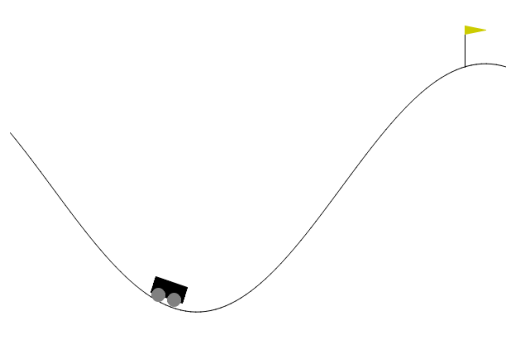

In [6]:
env.watch(RandomPolicy(env.get_action_space()), display, steps=100)

In [7]:
print(env.get_observation_space())
print(env.get_action_space())

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Box(-1.0, 1.0, (1,), float32)


In [8]:
from policy import CrossEntropyPolicy

action_size = len(env.get_action_space().sample())
state_size = len(env.get_observation_space().sample())
hidden_layer_size = 16

policy = CrossEntropyPolicy(
    s_size=state_size, a_size=action_size, h_size=hidden_layer_size, device=device
).to(device)

## Train

In [9]:
from train import CrossEntropyTrainer

max_steps_per_episode = 1000
gamma = 0.99
pop_size = 50
elite_frac = 0.2
sigma = 0.5
print_every = 10
target_score = 90.0
n_episodes = 500

trainer = CrossEntropyTrainer(
    policy,
    env,
    max_steps_per_episode=max_steps_per_episode,
    gamma=gamma,
    pop_size=pop_size,
    elite_frac=elite_frac,
    sigma=sigma,
    print_every=print_every,
    target_score=target_score,
    device=device,
)

In [9]:
scores = trainer.train(n_episodes)

Episode 10	Average Score: -7.77
Episode 20	Average Score: -7.47
Episode 30	Average Score: -5.98
Episode 40	Average Score: -5.87
Episode 50	Average Score: -5.47
Episode 60	Average Score: -4.71
Episode 70	Average Score: -4.14
Episode 80	Average Score: -3.93
Episode 90	Average Score: -3.72
Episode 100	Average Score: -3.41
Episode 110	Average Score: -2.82
Episode 120	Average Score: -2.27
Episode 130	Average Score: -2.08
Episode 140	Average Score: -1.72
Episode 150	Average Score: -1.38
Episode 160	Average Score: -1.39
Episode 170	Average Score: -1.40
Episode 180	Average Score: -1.23
Episode 190	Average Score: -1.13
Episode 200	Average Score: -1.22
Episode 210	Average Score: -1.08
Episode 220	Average Score: -1.07
Episode 230	Average Score: -1.07
Episode 240	Average Score: -0.95
Episode 250	Average Score: -0.92
Episode 260	Average Score: -0.84
Episode 270	Average Score: -0.77
Episode 280	Average Score: 7.87
Episode 290	Average Score: 17.30
Episode 300	Average Score: 26.77
Episode 310	Average 

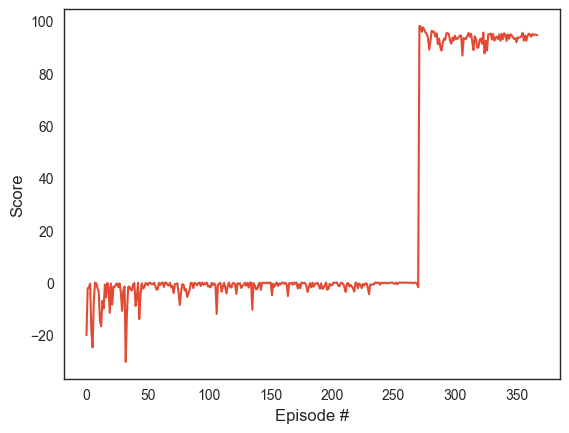

In [11]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel("Score")
plt.xlabel("Episode #")
plt.show()

## Watch a Smart Agent!

In [ ]:
trainer.evaluate(10)

In [ ]:
env.watch(policy, display)

## Save the Agent

In [10]:
import torch

# Define the path where you want to save the model
model_path = "./checkpoints/cross_entropy_policy_mountaincarcontinuous.pth"

# Save the model's state dictionary
torch.save(policy.state_dict(), model_path)

## Load the Agent

In [11]:
import torch

model_path = "./checkpoints/cross_entropy_policy_mountaincarcontinuous.pth"

# Load the saved state dictionary into the model
policy.load_state_dict(torch.load(model_path, weights_only=True))

<All keys matched successfully>